In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='./input/Rempah_Rempah_Classification/train'
test_directory='./input/Rempah_Rempah_Classification/test'
val_directory='./input/Rempah_Rempah_Classification/valid'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

vgg

In [5]:
  # useful for getting number of classes
folders = glob('./input/Rempah_Rempah_Classification/train/*')
len(folders)

7

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

#view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 165 images belonging to 7 classes.
Found 23 images belonging to 7 classes.


In [10]:
print(len(training_set))
print(len(test_set))

6
1


In [11]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
6/6 [==============================] - 16s 2s/step - loss: 2.4913 - accuracy: 0.3091 - val_loss: 2.8023 - val_accuracy: 0.2609
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 1.5097 - accuracy: 0.5212 - val_loss: 1.9418 - val_accuracy: 0.3913
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 0.9398 - accuracy: 0.6424 - val_loss: 2.1609 - val_accuracy: 0.5217
Epoch 4/10
6/6 [==============================] - 14s 2s/step - loss: 0.6109 - accuracy: 0.7697 - val_loss: 1.6107 - val_accuracy: 0.5652
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 0.4442 - accuracy: 0.8788 - val_loss: 1.5027 - val_accuracy: 0.5652
Epoch 6/10
6/6 [==============================] - 14s 2s/step - loss: 0.2008 - accuracy: 0.9273 - val_loss: 1.5634 - val_accuracy: 0.5217
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 0.1692 - accuracy: 0.9576 - val_loss: 1.3290 - val_accuracy: 0.5217
Epoch 8/10
6/6 [==================

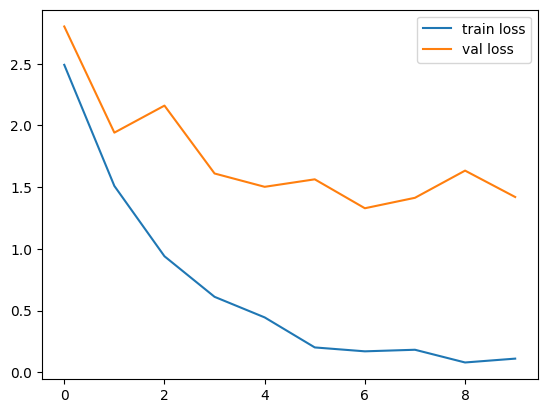

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

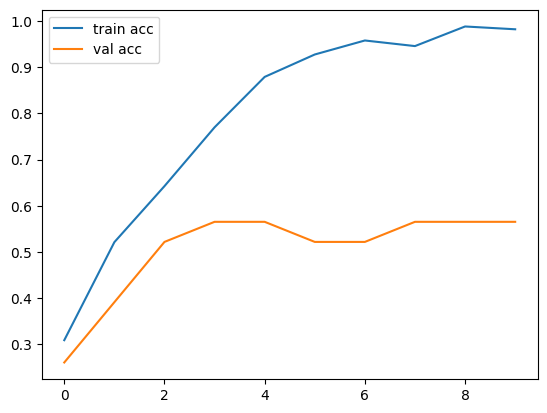

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
model.save('model-cnn.h5')

In [15]:
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

model1 = load_model('./Model/model-cnn.h5',compile=False)  

In [16]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

lab

{0: 'Andaliman',
 1: 'Cabe jawa',
 2: 'Cengkeh',
 3: 'Kapulaga',
 4: 'Kayu manis',
 5: 'Lada',
 6: 'Pala'}

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 239ms/step


'Pala'

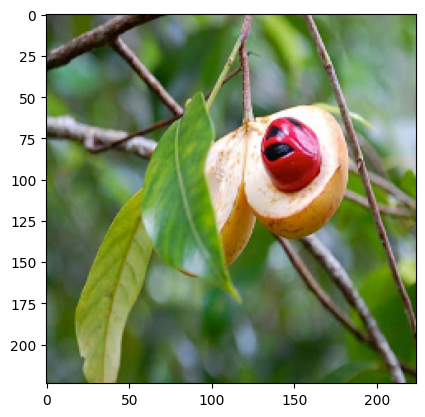

In [18]:
img='./input/Rempah_Rempah_Classification/val/Pala/30.jpg'
pic=load_img('./input/Rempah_Rempah_Classification/val/Pala/30.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [19]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.11.0
2.11.0
